In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.express as px

In [24]:
covid_df = pd.read_csv(r'/home/mayoubi/COVID_data/country_vaccinations.csv')

In [25]:
covid_df.shape

(3081, 15)

In [26]:
covid_df.isna().sum()

country                                   0
iso_code                                248
date                                      0
total_vaccinations                     1101
people_vaccinated                      1438
people_fully_vaccinated                2065
daily_vaccinations_raw                 1439
daily_vaccinations                      121
total_vaccinations_per_hundred         1101
people_vaccinated_per_hundred          1438
people_fully_vaccinated_per_hundred    2065
daily_vaccinations_per_million          121
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [27]:
covid_df.dropna(subset=['total_vaccinations', 'people_vaccinated'], how='all', inplace=True)
covid_df = covid_df.drop(columns=['daily_vaccinations_raw'])
covid_df['iso_code'].fillna('GBR', inplace = True) 

In [28]:
covid_df.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                      30
people_vaccinated                      367
people_fully_vaccinated                995
daily_vaccinations                     116
total_vaccinations_per_hundred          30
people_vaccinated_per_hundred          367
people_fully_vaccinated_per_hundred    995
daily_vaccinations_per_million         116
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [29]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 3080
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2010 non-null   object 
 1   iso_code                             2010 non-null   object 
 2   date                                 2010 non-null   object 
 3   total_vaccinations                   1980 non-null   float64
 4   people_vaccinated                    1643 non-null   float64
 5   people_fully_vaccinated              1015 non-null   float64
 6   daily_vaccinations                   1894 non-null   float64
 7   total_vaccinations_per_hundred       1980 non-null   float64
 8   people_vaccinated_per_hundred        1643 non-null   float64
 9   people_fully_vaccinated_per_hundred  1015 non-null   float64
 10  daily_vaccinations_per_million       1894 non-null   float64
 11  vaccines                      

# Which brand of vaccine is most used?

In [30]:
countries_vaccine_df = covid_df[['country', 'iso_code', 'vaccines']]

In [31]:
choropleth_grouping = countries_vaccine_df.groupby('country').max()

# What countries use which vaccines?

In [32]:
choropleth = px.choropleth(choropleth_grouping, locations = 'iso_code',
                           color = choropleth_grouping.index, hover_name = 'vaccines')
choropleth

# What vaccines are administered?

In [33]:
vaccine_df = pd.DataFrame(countries_vaccine_df.vaccines.str.split(', ').tolist(), 
                                index=countries_vaccine_df.country).stack()
vaccine_df = vaccine_df.reset_index([0, 'country'])
vaccine_df = vaccine_df.rename(columns = {0: 'vaccines'})
#split_vaccine_df

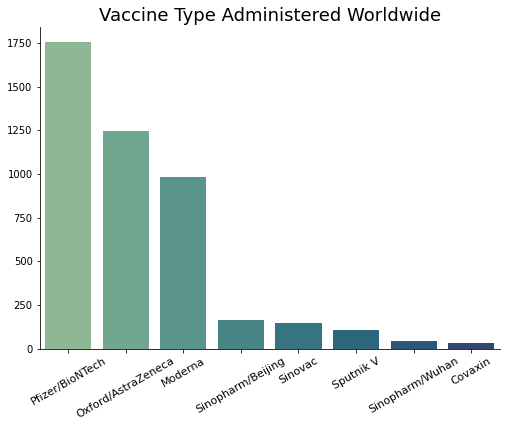

In [34]:
vaccine_count = sns.catplot(x='vaccines', kind='count', palette='crest', data=vaccine_df, 
                order=vaccine_df['vaccines'].value_counts().index, height=5, aspect=10/7)
plt.title('Vaccine Type Administered Worldwide', fontsize = 18)
vaccine_count.set_xticklabels(fontsize=11, rotation=30)
plt.xlabel('')
plt.ylabel('')
vaccine_count

# In which country is the vaccination program more advanced? 

In [35]:
total_vacs_df = covid_df.groupby('country').sum()
total_vacs_avg_df = covid_df.groupby('country').mean()
total_vacs_df.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,
Albania,5339.0,4900.0,439.0,650.0,0.19,0.17,0.02,226.0
Algeria,30.0,0.0,0.0,30.0,0.00,0.00,0.00,1.0
Andorra,2903.0,2903.0,0.0,94.0,3.76,3.76,0.00,1216.0
Anguilla,1341.0,1341.0,0.0,149.0,8.94,8.94,0.00,9932.0
Argentina,9395342.0,6477388.0,2370508.0,360749.0,20.80,14.32,5.25,7982.0


In [36]:
total_vacs_df = total_vacs_df.sort_values(['total_vaccinations'], ascending=False)
total_vacs_df[:5]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,
United States,916576780.0,732774855.0,165632502.0,39758829.0,274.06,219.13,49.51,118882.0
United Kingdom,283127289.0,266855544.0,16271745.0,11917829.0,417.05,393.07,23.97,175557.0
England,244425767.0,229231295.0,15194472.0,10122400.0,434.25,407.26,27.00,179835.0
Israel,164526770.0,118198329.0,46328441.0,6057930.0,1900.79,1365.59,535.23,699891.0
China,158487000.0,0.0,0.0,6399173.0,11.01,0.00,0.00,4445.0


<AxesSubplot:title={'center':'Top 5 Countries (highest total vaccinations)'}>

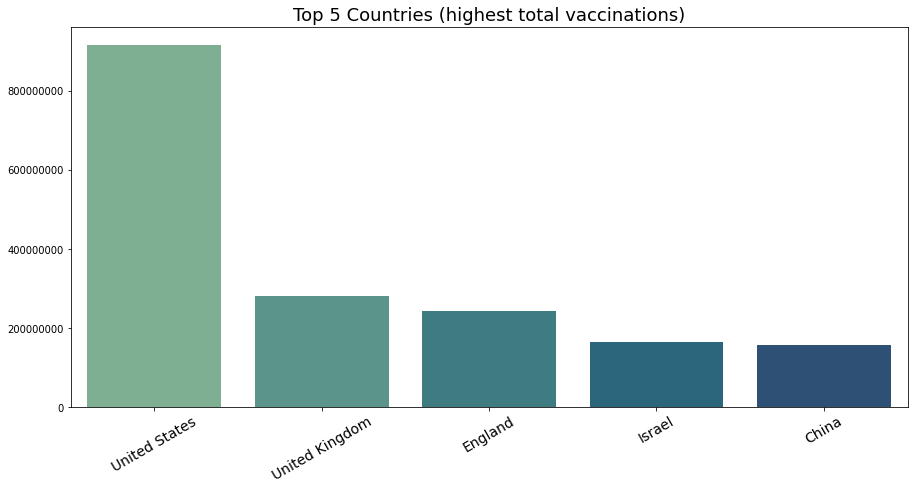

In [37]:
# Plotting a bar graph of the total vaccinations in each country, for the top 5 countries

top_5_total = total_vacs_df[:5]
plt.figure(figsize=(15,7))
country_total_count = sns.barplot(x=top_5_total.index, y = 'total_vaccinations', 
                                  palette='crest', data=top_5_total)
plt.title('Top 5 Countries (highest total vaccinations)', fontsize = 18)
country_total_count.set_xticklabels(country_total_count.get_xticklabels(), fontsize=14, rotation=30)
plt.ticklabel_format(style='plain', axis='y')
country_total_count.tick_params(axis='both', which='minor', labelsize=12)
plt.xlabel('')
plt.ylabel('')
country_total_count

In [38]:
vacs_per100_df = total_vacs_avg_df.sort_values(['total_vaccinations_per_hundred'], ascending=False)
vacs_per100_df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,
Gibraltar,1.228253e+04,1.030088e+04,4.836846e+03,704.709677,36.455937,30.575313,14.356154,20916.967742
Israel,2.886435e+06,2.073655e+06,1.129962e+06,108177.321429,33.347193,23.957719,13.054390,12498.053571
United Arab Emirates,2.681180e+06,8.365680e+05,2.500000e+05,101562.194444,27.109189,8.460000,2.530000,10268.694444
Seychelles,2.542081e+04,2.368400e+04,6.078833e+03,1493.750000,25.850000,24.083333,6.181667,15189.750000
Cayman Islands,1.084920e+04,6.946800e+03,4.878000e+03,444.500000,16.508000,10.572000,7.420000,6763.250000
...,...,...,...,...,...,...,...,...
Pakistan,1.361400e+04,1.361400e+04,NaN,3404.000000,0.005000,0.005000,NaN,15.000000
Cambodia,7.460000e+02,7.460000e+02,NaN,1492.000000,0.005000,0.005000,NaN,89.000000
Algeria,1.500000e+01,NaN,NaN,30.000000,0.000000,NaN,NaN,1.000000


<AxesSubplot:title={'center':'Top 20 Vaccinated Countries (highest per population)'}, ylabel='Vaccinations per hundred'>

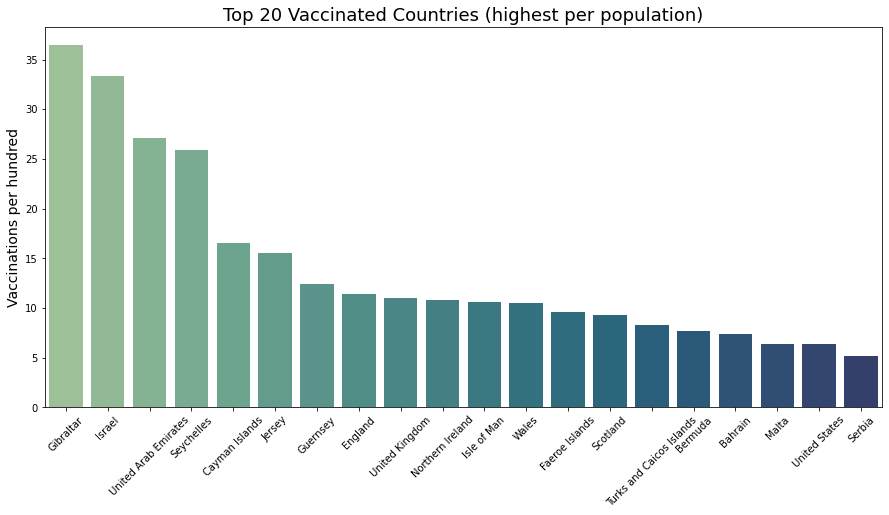

In [39]:
top_20_per_100 = vacs_per100_df[:20]
plt.figure(figsize=(15,7))
country_daily_count = sns.barplot(x=top_20_per_100.index, y = 'total_vaccinations_per_hundred', 
                                  palette='crest', dodge=False, data=top_20_per_100)
plt.title('Top 20 Vaccinated Countries (highest per population)', fontsize = 18)
    
country_daily_count.set_xticklabels(country_daily_count.get_xticklabels(), fontsize=10, rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.ylabel('Vaccinations per hundred', fontsize=14)
country_daily_count